In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
with open("allData.pkl","rb") as f:
    d=pickle.load(f)

In [3]:
crop_param=d['CropParameters']

In [4]:
#View the data
crop_param.head()

,%Time,Stem_elong,Stem_thick,Cum_trusses,stem_dens,plant_dens
0,43823,14.4,7.1,NaN,3.6,1.8
1,43830,27.9,10.5,0.9,3.6,1.8
2,43838,32.8,12.8,2.8,3.6,1.8
3,43845,30.2,12.8,4.0,3.6,1.8
4,43852,30.3,12.5,5.2,4.5,1.8


In [5]:
#Basic information
crop_param.info()
#Describe the data
crop_param.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   %Time        138 non-null    int64  
 1   Stem_elong   138 non-null    object 
 2   Stem_thick   108 non-null    float64
 3   Cum_trusses  108 non-null    float64
 4   stem_dens    137 non-null    float64
 5   plant_dens   138 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 6.6+ KB


,%Time,Stem_thick,Cum_trusses,stem_dens,plant_dens
count,138.000000,108.000000,108.000000,137.000000,138.000000
mean,43900.913043,10.837037,12.432407,4.591241,1.700000
std,46.740701,1.327818,6.699488,1.096802,0.257515
min,43823.000000,6.700000,0.900000,2.600000,1.300000
25%,43859.000000,10.275000,6.850000,3.900000,1.400000
50%,43901.000000,10.950000,12.400000,4.500000,1.800000
75%,43943.000000,11.700000,18.200000,5.200000,1.950000
max,43978.000000,13.600000,23.800000,8.000000,1.950000


In [6]:
crop_param.shape

(138, 6)

In [7]:
crop_param.nunique()

%Time          23
Stem_elong     75
Stem_thick     44
Cum_trusses    86
stem_dens      10
plant_dens      4
dtype: int64

In [8]:
crop_param.dtypes

%Time            int64
Stem_elong      object
Stem_thick     float64
Cum_trusses    float64
stem_dens      float64
plant_dens     float64
dtype: object

In [9]:
crop_param.columns

Index(['%Time', 'Stem_elong', 'Stem_thick', 'Cum_trusses', 'stem_dens ',
       'plant_dens'],
      dtype='object')

In [10]:
#Find the duplicates
crop_param.duplicated().sum()

0

In [11]:
#Find NaN values
crop_param.isna().sum()

%Time           0
Stem_elong      0
Stem_thick     30
Cum_trusses    30
stem_dens       1
plant_dens      0
dtype: int64

In [12]:
#Replacing Nan values with mean of their respective columns
imputer = SimpleImputer(strategy = "mean")
cn= crop_param.columns
values =crop_param.values
df = imputer.fit_transform(values)
crop_param = pd.DataFrame(df, columns = cn)

In [13]:
crop_param.head()

,%Time,Stem_elong,Stem_thick,Cum_trusses,stem_dens,plant_dens
0,43823.0,14.4,7.1,12.432407,3.6,1.8
1,43830.0,27.9,10.5,0.900000,3.6,1.8
2,43838.0,32.8,12.8,2.800000,3.6,1.8
3,43845.0,30.2,12.8,4.000000,3.6,1.8
4,43852.0,30.3,12.5,5.200000,4.5,1.8


### We can see that the NaN values are replaced by the means of their respective columns

In [14]:
#renaming
crop_param.rename(columns={"stem_dens ": "stem_dens", "%Time": "Time"}, inplace=True)

In [15]:
#changing time format
crop_param['Time'] = pd.to_datetime(crop_param['Time'], unit='D', origin='1899-12-30')

In [16]:
crop_param.head()

,Time,Stem_elong,Stem_thick,Cum_trusses,stem_dens,plant_dens
0,2019-12-24,14.4,7.1,12.432407,3.6,1.8
1,2019-12-31,27.9,10.5,0.900000,3.6,1.8
2,2020-01-08,32.8,12.8,2.800000,3.6,1.8
3,2020-01-15,30.2,12.8,4.000000,3.6,1.8
4,2020-01-22,30.3,12.5,5.200000,4.5,1.8


<ipython-input-17-f8605c9feaec>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(crop_param.corr(), annot=True)


<AxesSubplot:>

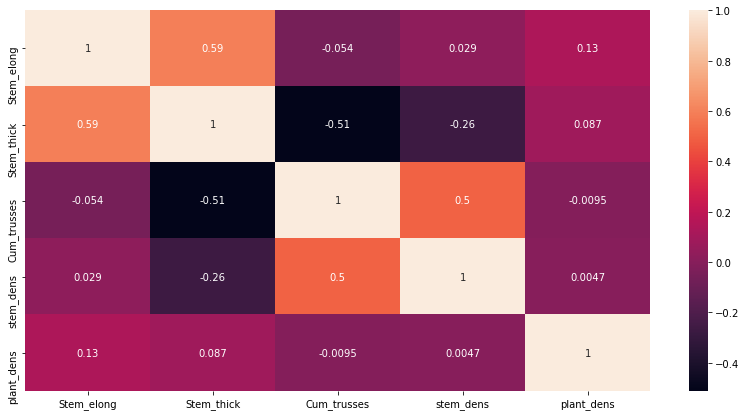

In [17]:
#correlation
plt.figure(figsize=(14,7))
sns.heatmap(crop_param.corr(), annot=True)

In [18]:
correlations = crop_param.corr()
cols = correlations
for i in cols:
    for j in cols:
         if i!=j and abs(correlations.loc[i, j])>= 0.6:
            print(f"{i} and {j} correlated with value {correlations.loc[i, j]}")

<ipython-input-18-b48375d323d7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = crop_param.corr()


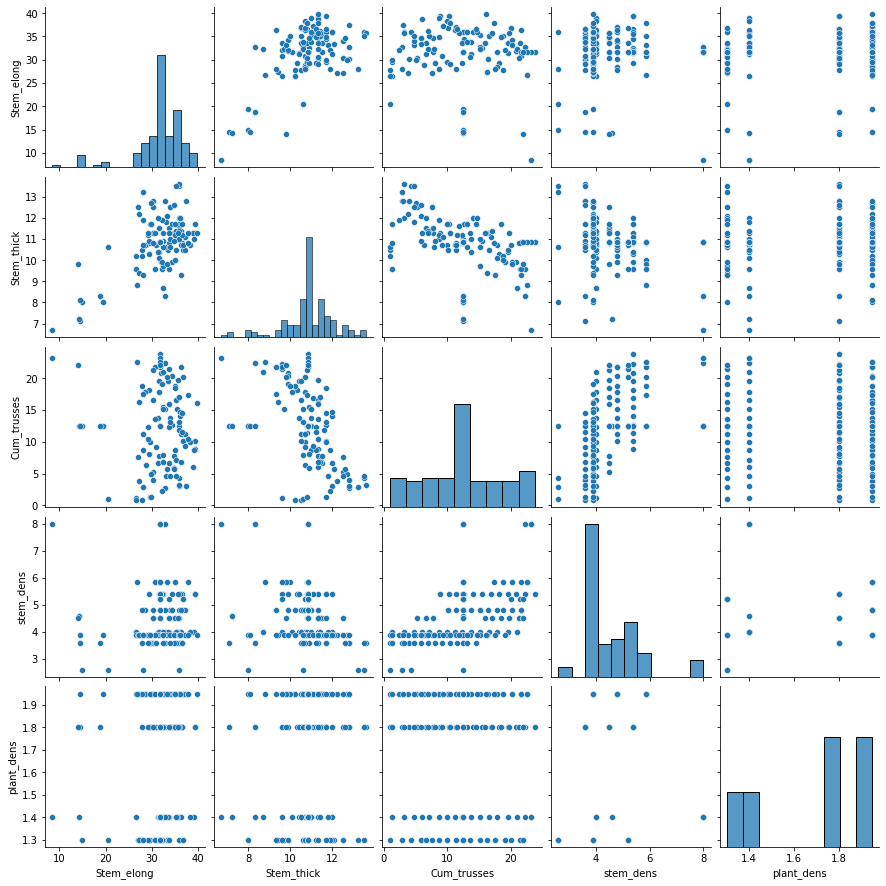

In [19]:
sns.pairplot(crop_param)

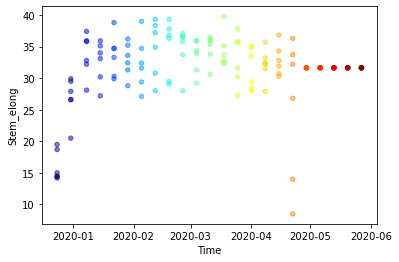

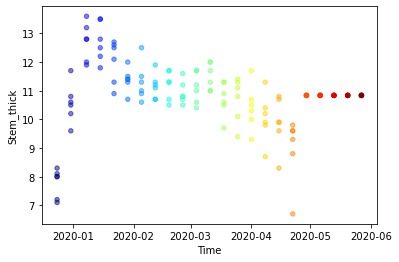

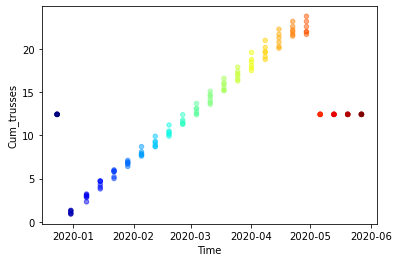

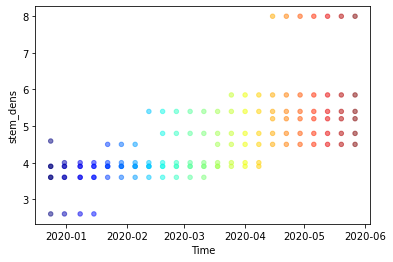

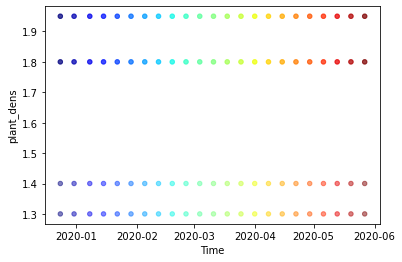

In [20]:
#scatter plot with respect to time 
columns=['Stem_elong', 'Stem_thick', 'Cum_trusses', 'stem_dens',
       'plant_dens']
for i in columns:
    crop_param.plot(kind='scatter',x='Time', y=i, alpha=0.5, c='Time',cmap=plt.get_cmap("jet"))